# Paths for the CIR process- two different boundary conditions considered

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.integrate as integrate
from mpl_toolkits import mplot3d

In [7]:
###### Code to be completed

def GeneratePathsCIREuler2Schemes(NoOfSteps, T, kappa, v0, vbar, gamma, NoOfPaths = 1):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
    
    V1 = np.zeros([NoOfPaths, NoOfSteps+1])
    V2 = np.zeros([NoOfPaths, NoOfSteps+1])
    V1[:,0]=v0
    V2[:,0]=v0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    
    for i in range(0, NoOfSteps):

        # Making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        # Truncated boundary condition
        V1[:,i+1] = V1[:,i] + kappa*(vbar - V1[:,i]) * dt + gamma* np.sqrt(V1[:,i]) * (W[:,i+1]-W[:,i])
        V1[:,i+1] = np.maximum(V1[:,i+1],0.0)
        
        # Reflecting boundary condition
        V2[:,i+1] = V2[:,i] + kappa*(vbar - V2[:,i]) * dt + gamma* np.sqrt(V2[:,i]) * (W[:,i+1]-W[:,i])
        V2[:,i+1] = np.abs(V2[:,i+1])
        
        time[i+1] = time[i] +dt
        
    # Outputs
    paths = {"time":time,"Vtruncated":V1,"Vreflected":V2}
    
    return paths

In [8]:
# Set the parameters
N = 1
m = 700
T = 1 
kappa = 0.5
v0 = 0.1
vbar = 0.01
gamma = 0.8

In [9]:
np.random.seed(2)
Paths = GeneratePathsCIREuler2Schemes(m,T,kappa,v0,vbar,gamma, N)
timeGrid = Paths["time"]
V_truncated = Paths["Vtruncated"]
V_reflected = Paths["Vreflected"]

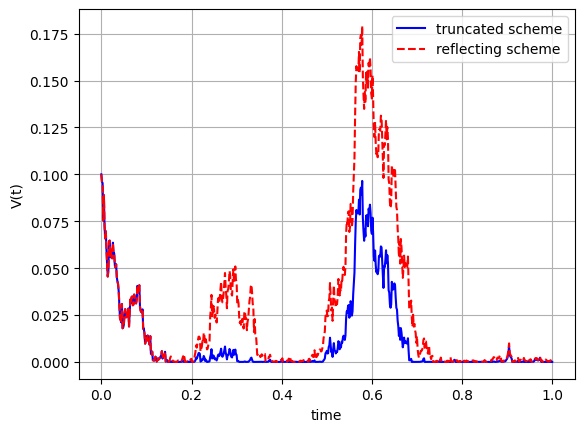

In [10]:
plt.figure(1)
plt.plot(timeGrid, np.transpose(V_truncated),'b')   
plt.plot(timeGrid, np.transpose(V_reflected),'--r')   
plt.grid()
plt.xlabel("time")
plt.ylabel("V(t)")
plt.legend(['truncated scheme','reflecting scheme']);  